In [51]:
#Adding Relu activation adds non-linearity to the problem. that is why accuracy is higher than privous version. Since previous version is only a linear function.

In [115]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
from sklearn.inspection import DecisionBoundaryDisplay
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary


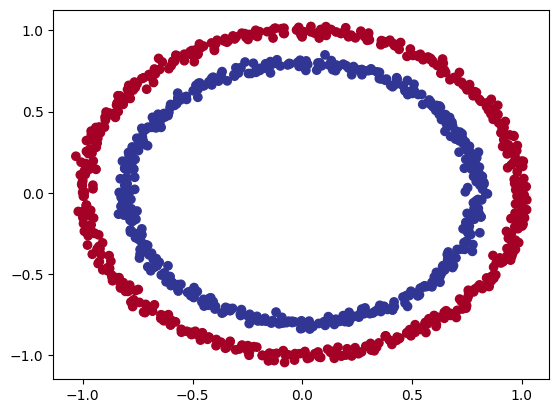

In [116]:
# get data from sklearn datasets 
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.02, random_state=42)
X[:5],y[:5]
# graph data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [117]:
# turn data to tensor and float32 datatype
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(750, 750, 250, 250)

In [118]:
X_train[:5], y_train[:5]

(tensor([[ 0.3214, -0.7403],
         [-0.3083,  0.9467],
         [-0.4946, -0.6449],
         [-0.8783,  0.4797],
         [ 0.7482, -0.6957]]),
 tensor([1., 0., 1., 0., 0.]))

In [104]:
class BinaryClassificationV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_one = nn.Linear(in_features=2,
                                   out_features=10)
        self.layer_two = nn.Linear(in_features=10,
                                   out_features=10)
        self.layer_three = nn.Linear(in_features=10,
                                     out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_three(self.relu(self.layer_two(self.relu(self.layer_one(x)))))


In [105]:
def accuracy(y_true, y_values):
    correct = torch.eq(y_true, y_values).sum().item()
    acc = (correct / len(y_values))*100
    return acc

In [106]:
# Create model
model_v1 = BinaryClassificationV2()
print(model_v1)
# loss function
loss_fn = nn.BCEWithLogitsLoss()
# optimizer
optimizer = torch.optim.SGD(model_v1.parameters(), lr=0.1)

BinaryClassificationV2(
  (layer_one): Linear(in_features=2, out_features=10, bias=True)
  (layer_two): Linear(in_features=10, out_features=10, bias=True)
  (layer_three): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [107]:
# Create model
model_v1 = BinaryClassificationV2()
print(model_v1)
# loss function
loss_fn = nn.BCEWithLogitsLoss()
# optimizer
optimizer = torch.optim.SGD(model_v1.parameters(), lr=0.1)

BinaryClassificationV2(
  (layer_one): Linear(in_features=2, out_features=10, bias=True)
  (layer_two): Linear(in_features=10, out_features=10, bias=True)
  (layer_three): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


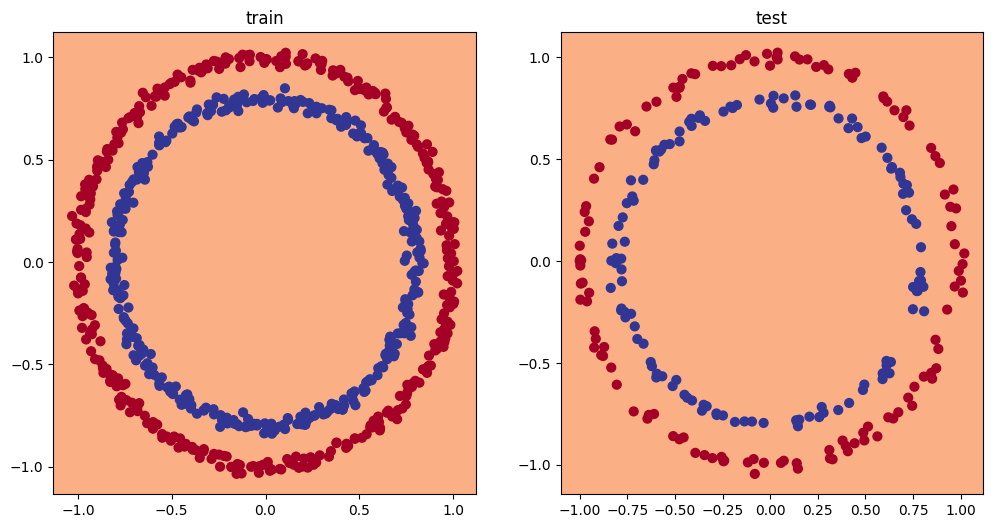

In [108]:
# Graph
# plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_v1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_v1, X_test, y_test)
X_train

In [109]:
# training
torch.manual_seed(42)
epochs = 4000
epoch_count = []
testing_loss = []
training_loss = []

for epoch in range(epochs):
    model_v1.train()

    logits = model_v1(X_train).squeeze() # the output of sigmoif from BCE with logits is logits and it has one dimenstion. the Squeeze remove the dimension
    loss = loss_fn(logits, y_train) #3 calculate the loss 
    y_preds = torch.round(torch.sigmoid(logits)) # make prediction 

    acc = accuracy(y_preds, y_train) # calculate accuracy which is correct valuees of overall values times 100
    optimizer.zero_grad() # make backpropagation not take into account preivous gradients 

    loss.backward() # perform backpropagation
    optimizer.step() # update weights and bias base on backpropagation gradient descent.

    #test
    model_v1.eval()
    with torch.inference_mode():
        test_logits = model_v1(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        
        epoch_count.append(epoch)
        training_loss.append(loss.numpy())
        testing_loss.append(test_loss.numpy())
        
        test_y_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy(test_y_preds, y_test)
        
        if epoch % 400 == 0:
            print(f"Epoch: {epoch}, Train Acc : {acc}%, Train Loss: {loss}, Test Acc: {test_acc}%, Test Loss: {test_loss}")

    

Epoch: 0, Train Acc : 50.0%, Train Loss: 0.7065972685813904, Test Acc: 50.0%, Test Loss: 0.7056869864463806
Epoch: 400, Train Acc : 53.2%, Train Loss: 0.6871685981750488, Test Acc: 51.6%, Test Loss: 0.6886402368545532
Epoch: 800, Train Acc : 59.86666666666667%, Train Loss: 0.6693296432495117, Test Acc: 57.99999999999999%, Test Loss: 0.6754864454269409
Epoch: 1200, Train Acc : 85.73333333333333%, Train Loss: 0.5670071840286255, Test Acc: 84.8%, Test Loss: 0.5774122476577759
Epoch: 1600, Train Acc : 100.0%, Train Loss: 0.15647633373737335, Test Acc: 100.0%, Test Loss: 0.15491768717765808
Epoch: 2000, Train Acc : 100.0%, Train Loss: 0.035822544246912, Test Acc: 100.0%, Test Loss: 0.03460770845413208
Epoch: 2400, Train Acc : 100.0%, Train Loss: 0.0168913621455431, Test Acc: 100.0%, Test Loss: 0.01655127853155136
Epoch: 2800, Train Acc : 100.0%, Train Loss: 0.010566405020654202, Test Acc: 100.0%, Test Loss: 0.01074830163270235
Epoch: 3200, Train Acc : 100.0%, Train Loss: 0.00754106603562831

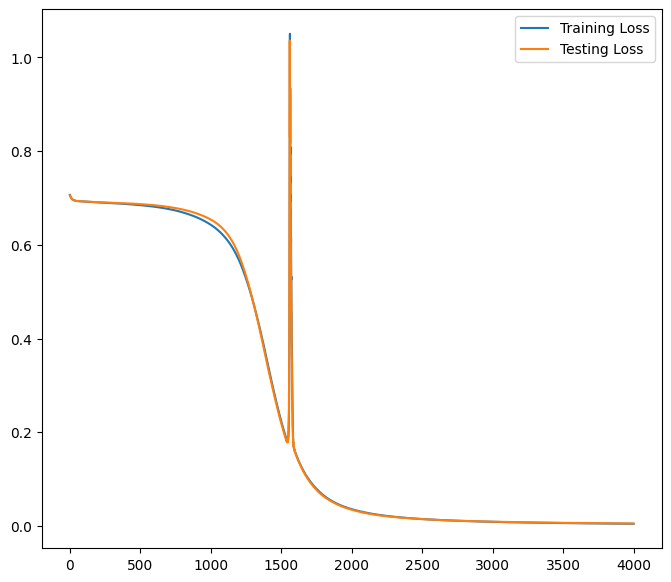

In [110]:
plt.subplots(figsize=(8,7))
plt.plot(epoch_count, training_loss, label='Training Loss')
plt.plot(epoch_count, testing_loss, label='Testing Loss')
plt.legend()
plt.show()


In [111]:
# save model
PATH = "/Users/marcdanielregistre/machine_learning/pytorch/binaryclassificationV2/binaryclassificationV2.pt"

torch.save(model_v1.state_dict(), PATH)


In [112]:
loaded_model = BinaryClassificationV2()

loaded_model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

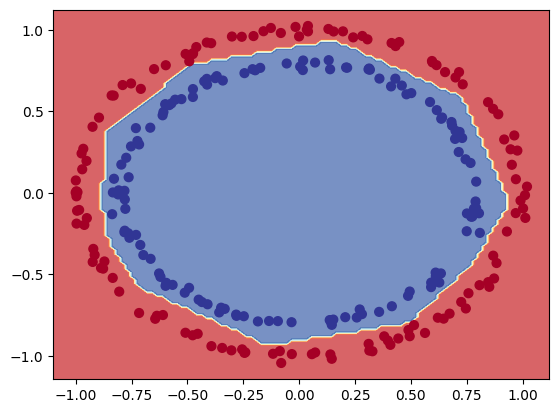

In [113]:
loaded_model.eval()
with torch.inference_mode():
    logits = loaded_model(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(logits))

    len(X_train), len(y_train), len(X_test), len(y_test)
    plot_decision_boundary(model_v1, X_test, y_preds)
    
    